<a href="https://colab.research.google.com/github/juztmsd777777/nlp-assignments/blob/main/Nlp_Asmnt_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import spacy as sp
import matplotlib.pyplot as plt
import nltk
import re

Load Data

In [ ]:

tweets_df = pd.read_csv('/content/Tweets.csv')
print(tweets_df.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

Clean Text Data

In [ ]:
def clean_tweet(tweet):
    text = re.sub(r'@[A-Za-z0-9]+', '', tweet) # Remove mentions
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # Remove special characters
    text = text.lower() # Convert to lowercase
    return text.strip() # Remove leading/trailing whitespace

tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_tweet)
print(tweets_df[['text', 'cleaned_text']].head())

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                        cleaned_text  
0                                         what  said  
1  plus youve added commercials to the experience...  
2  i didnt today must mean i need to take another...  
3  its really aggressive to blast obnoxious enter...  
4            and its a really big bad thing about it  


Extract Text in Tweet

In [ ]:
def extract_hashtags(tweet):
    hashtags = re.findall(r'#\w+', tweet)
    return hashtags

all_hashtags = tweets_df['text'].apply(extract_hashtags)
print(all_hashtags.head())

0    []
1    []
2    []
3    []
4    []
Name: text, dtype: object


In [ ]:
from collections import Counter

flat_hashtags = [hashtag for sublist in all_hashtags for hashtag in sublist]
hashtag_frequencies = Counter(flat_hashtags)

# Convert to DataFrame for easier manipulation and plotting
hashtag_freq_df = pd.DataFrame(hashtag_frequencies.items(), columns=['Hashtag', 'Frequency']).sort_values(by='Frequency', ascending=False)

print(hashtag_freq_df.head(10))

                 Hashtag  Frequency
778  #DestinationDragons         75
4                  #fail         57
124             #jetblue         35
172      #UnitedAirlines         35
32      #customerservice         34
232       #usairwaysfail         26
67     #AmericanAirlines         24
63         #disappointed         22
132              #avgeek         19
227          #badservice         19


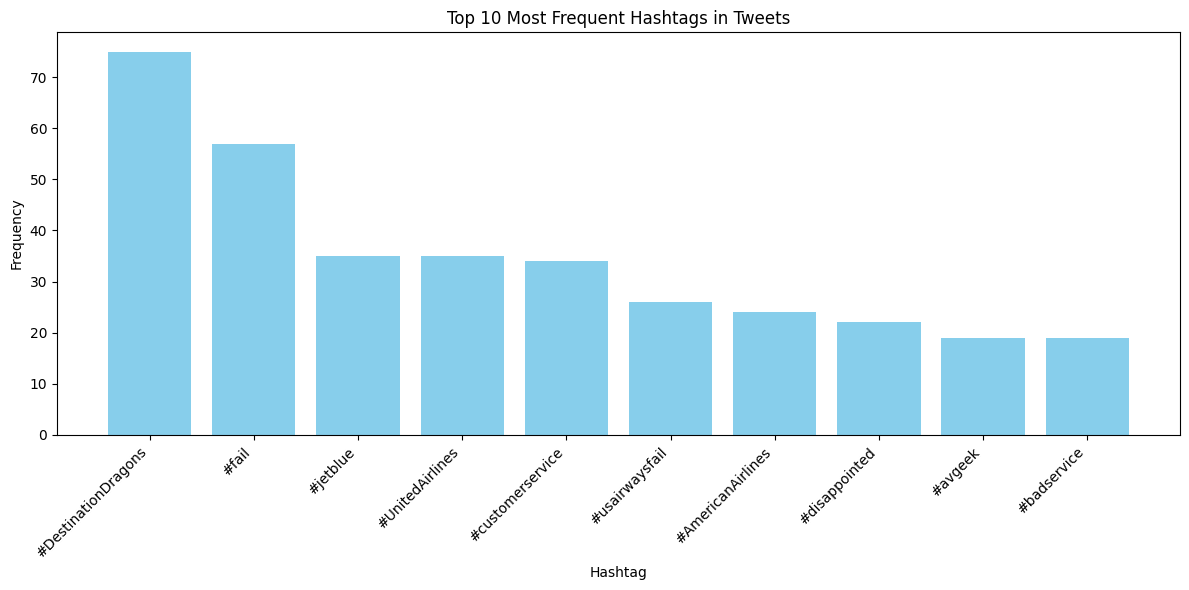

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(hashtag_freq_df['Hashtag'].head(10), hashtag_freq_df['Frequency'].head(10), color='skyblue')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Hashtags in Tweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

print("NLTK resources 'punkt', 'stopwords', and 'wordnet' downloaded.")

NLTK resources 'punkt', 'stopwords', and 'wordnet' downloaded.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize

tweets_df['tokenized_text'] = tweets_df['cleaned_text'].apply(word_tokenize)
print(tweets_df[['cleaned_text', 'tokenized_text']].head())

                                        cleaned_text  \
0                                         what  said   
1  plus youve added commercials to the experience...   
2  i didnt today must mean i need to take another...   
3  its really aggressive to blast obnoxious enter...   
4            and its a really big bad thing about it   

                                      tokenized_text  
0                                       [what, said]  
1  [plus, youve, added, commercials, to, the, exp...  
2  [i, didnt, today, must, mean, i, need, to, tak...  
3  [its, really, aggressive, to, blast, obnoxious...  
4  [and, its, a, really, big, bad, thing, about, it]  


In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

tweets_df['filtered_text'] = tweets_df['tokenized_text'].apply(remove_stopwords)
print(tweets_df[['tokenized_text', 'filtered_text']].head())

                                      tokenized_text  \
0                                       [what, said]   
1  [plus, youve, added, commercials, to, the, exp...   
2  [i, didnt, today, must, mean, i, need, to, tak...   
3  [its, really, aggressive, to, blast, obnoxious...   
4  [and, its, a, really, big, bad, thing, about, it]   

                                       filtered_text  
0                                             [said]  
1  [plus, youve, added, commercials, experience, ...  
2  [didnt, today, must, mean, need, take, another...  
3  [really, aggressive, blast, obnoxious, enterta...  
4                          [really, big, bad, thing]  


In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

tweets_df['lemmatized_text'] = tweets_df['filtered_text'].apply(lemmatize_tokens)
print(tweets_df[['filtered_text', 'lemmatized_text']].head())

                                       filtered_text  \
0                                             [said]   
1  [plus, youve, added, commercials, experience, ...   
2  [didnt, today, must, mean, need, take, another...   
3  [really, aggressive, blast, obnoxious, enterta...   
4                          [really, big, bad, thing]   

                                     lemmatized_text  
0                                             [said]  
1  [plus, youve, added, commercial, experience, t...  
2  [didnt, today, must, mean, need, take, another...  
3  [really, aggressive, blast, obnoxious, enterta...  
4                          [really, big, bad, thing]  


In [ ]:
tweets_df['processed_text'] = tweets_df['lemmatized_text'].apply(lambda tokens: ' '.join(tokens))
print(tweets_df[['text', 'cleaned_text', 'tokenized_text', 'filtered_text', 'lemmatized_text', 'processed_text']].head())

                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                        cleaned_text  \
0                                         what  said   
1  plus youve added commercials to the experience...   
2  i didnt today must mean i need to take another...   
3  its really aggressive to blast obnoxious enter...   
4            and its a really big bad thing about it   

                                      tokenized_text  \
0                                       [what, said]   
1  [plus, youve, added, commercials, to, the, exp...   
2  [i, didnt, today, must, mean, i, need, to, tak...   
3  [its, really, aggressive, to, blast, obnoxious...   
4  [and, its, a, really, big, bad, thing, abou

Rejoining

In [ ]:
print(tweets_df[['processed_text', 'airline_sentiment']].head())

                                      processed_text airline_sentiment
0                                               said           neutral
1       plus youve added commercial experience tacky          positive
2       didnt today must mean need take another trip           neutral
3  really aggressive blast obnoxious entertainmen...          negative
4                               really big bad thing          negative


PipeLine

In [ ]:
def tweet_nlp_pipeline(text):
    text = clean_tweet(text)
    tokens = word_tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize_tokens(tokens)
    return " ".join(tokens)

tweets_df["processed_tweet"] = tweets_df["text"].apply(tweet_nlp_pipeline)
print(tweets_df[['text', 'processed_tweet']].head())
display(tweets_df[['processed_text', 'airline_sentiment']].head())


                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                     processed_tweet  
0                                               said  
1       plus youve added commercial experience tacky  
2       didnt today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing  


,processed_text,airline_sentiment
0,said,neutral
1,plus youve added commercial experience tacky,positive
2,didnt today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainmen...,negative
4,really big bad thing,negative
